In [43]:
from astropy.table import Table
from astropy.io import ascii
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as const

In [42]:
def calc_Noverg(line_flux, line_name, flux_err=None):
    #format - A, wavelength, Eupper, g_J
    line_dict = {'H2_10_S2':[3.98e-7, 2.0338, 7584, 9], 'H2_10_S1':[3.47e-7, 2.1218, 6956, 21],
                'H2_10_S0':[2.53e-7, 2.2235, 6471, 5], 'H2_21_S1':[4.98e-7, 2.2477, 12550, 21],
                'H2_21_S2':[5.60e-7, 2.1542, 13150, 9], 'H2_21_S3':[5.77e-7, 2.0735, 13890, 33],
                'H2_10_Q1':[4.29e-7, 2.4066, 6149, 9]}
    
    line_A, line_wave, Eupper, g_J = line_dict[line_name]
    Noverg = 4*np.pi*(line_wave*u.micron)/(const.h * const.c) * (line_flux*u.erg/u.s/(u.cm**2)) / (line_A/u.s)
    
    Noverg = Noverg.decompose().to(u.cm**-2) / g_J
    
    if flux_err is not None:
        Noverg_err = 4*np.pi*(line_wave*u.micron)/(const.h * const.c) * (flux_err*u.erg/u.s/(u.cm**2)) / (line_A/u.s)
        Noverg_err = Noverg_err.decompose().to(u.cm**-2) / g_J
    
        return Noverg, Eupper, Noverg_err

    else:
        return Noverg, Eupper

In [32]:
def linfunc(x, a, b):
    return a*x + b

In [33]:
tab_100pc = Table.read('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/NIFS_100pc_fluxes.csv')
tab_10pc = Table.read('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/NIFS_10pc_fluxes.csv')
tab_1px = Table.read('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/NIFS_1pix_fluxes.csv')

tab_ann = Table.read('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/NIFS_ann_300pc_fluxes.csv')

ratio_21_10_otr = tab_ann['H2(2-1)S(1)_flux'][0] / tab_ann['H2(1-0)S(1)_flux'][0]
ratio_21_10_otr_err = ratio_21_10_otr * np.sqrt((tab_ann['H2(2-1)S(1)_flux_err'][0] / tab_ann['H2(2-1)S(1)_flux'][0])**2 + 
                              (tab_ann['H2(1-0)S(1)_flux_err'][0]/tab_ann['H2(1-0)S(1)_flux'][0])**2)
ratio_21_10_ctr = tab_100pc['H2(2-1)S(1)_flux'][0] / tab_100pc['H2(1-0)S(1)_flux'][0]
ratio_21_10_ctr_err = ratio_21_10_ctr * np.sqrt((tab_100pc['H2(2-1)S(1)_flux_err'][0] / tab_100pc['H2(2-1)S(1)_flux'][0])**2 + 
                              (tab_100pc['H2(1-0)S(1)_flux_err'][0]/tab_100pc['H2(1-0)S(1)_flux'][0])**2)


ratio_s2s0_otr = tab_ann['H2(1-0)S(2)_flux'][0] / tab_ann['H2(1-0)S(0)_flux'][0]
ratio_s2s0_otr_err = ratio_21_10_otr * np.sqrt((tab_ann['H2(1-0)S(2)_flux_err'][0] / tab_ann['H2(1-0)S(2)_flux'][0])**2 + 
                              (tab_ann['H2(1-0)S(0)_flux_err'][0]/tab_ann['H2(1-0)S(0)_flux'][0])**2)
ratio_s2s0_ctr = tab_100pc['H2(1-0)S(2)_flux'][0] / tab_100pc['H2(1-0)S(0)_flux'][0]
ratio_s2s0_ctr_err = ratio_21_10_ctr * np.sqrt((tab_100pc['H2(1-0)S(2)_flux_err'][0] / tab_100pc['H2(1-0)S(2)_flux'][0])**2 + 
                              (tab_100pc['H2(1-0)S(0)_flux_err'][0]/tab_100pc['H2(1-0)S(0)_flux'][0])**2)

H2_brgamma_ctr = tab_100pc['H2(1-0)S(0)_flux'][0]/tab_100pc['Brgamma_flux'][0]
H2_brgamma_otr = tab_ann['H2(1-0)S(0)_flux'][0]/tab_ann['Brgamma_flux'][0]

In [8]:
U19 = ascii.read('/Users/jotter/highres_PSBs/tables/U19_tab2.txt')

/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_16289/1984942061.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ratio_s2s0 = ratio_s2s1/ratio_s0s1
/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_16289/1984942061.py:17: RuntimeWarning: divide by zero encountered in true_divide
  e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)


Text(0.51, 2.2, 'Non-thermal')

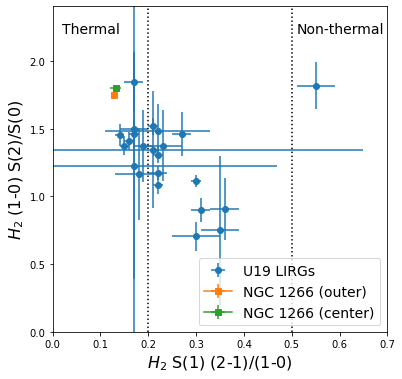

In [10]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ratio_21_10 = U19['2-1_S(1)/1-0_S(1)']
e_ratio_21_10 = U19['e_2-1_S(1)/1-0_S(1)']

noulim_ind_21 = np.where(e_ratio_21_10 > 0)

ratio_s2s1 = U19['1-0_S(2)/1-0_S(1)']
e_ratio_s2s1 = U19['e_1-0_S(2)/1-0_S(1)']

ratio_s0s1 = U19['1-0_S(0)/1-0_S(1)']
e_ratio_s0s1 = U19['e_1-0_S(0)/1-0_S(1)']

ratio_s2s0 = ratio_s2s1/ratio_s0s1
e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)

noulim_ind_s2s1 = np.where(e_ratio_s2s1 > 0)
noulim_ind_s0s1 = np.where(e_ratio_s0s1 > 0)
noulim_ind_s2s0 = np.intersect1d(noulim_ind_s2s1, noulim_ind_s0s1)

noulim_ind = np.intersect1d(noulim_ind_21, noulim_ind_s2s0)

ax.errorbar(ratio_21_10[noulim_ind], ratio_s2s0[noulim_ind], xerr=e_ratio_21_10[noulim_ind], yerr=e_ratio_s2s0[noulim_ind],
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(ratio_21_10_otr, ratio_s2s0_otr, xerr=ratio_21_10_otr_err, yerr=ratio_s2s0_otr_err,
            marker='s', label='NGC 1266 (outer)')
ax.errorbar(ratio_21_10_ctr, ratio_s2s0_ctr, xerr=ratio_21_10_ctr_err, yerr=ratio_s2s0_ctr_err,
            marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'$H_2$ S(1) (2-1)/(1-0)', fontsize=16)
ax.set_ylabel(r'$H_2$ (1-0) S(2)/S(0)', fontsize=16)

plt.legend(fontsize=14, loc='lower right')

ax.set_xlim(0,0.7)
ax.set_ylim(0,2.4)

ax.axvline(0.2, linestyle='dotted', color='k')
ax.axvline(0.5, linestyle='dotted', color='k')

ax.text(0.02, 2.2, 'Thermal', fontsize=14)
ax.text(0.51, 2.2, 'Non-thermal', fontsize=14)


/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_16289/1094326082.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Tvib = 5600/np.log(1.355 / ratio_21_10)


(500.0, 3000.0)

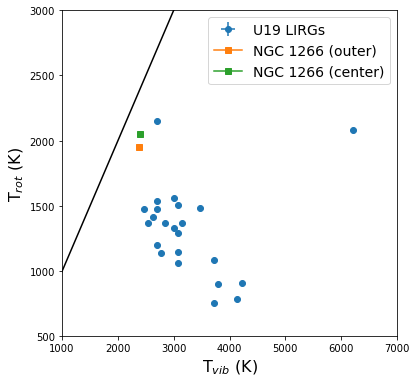

In [11]:
Tvib = 5600/np.log(1.355 / ratio_21_10)
Trot = -1113/np.log(0.323 * ratio_s2s0)

Tvib_ctr = 5600/np.log(1.355 / ratio_21_10_ctr)
Trot_ctr = -1113/np.log(0.323 * ratio_s2s0_ctr)
Tvib_otr = 5600/np.log(1.355 / ratio_21_10_otr)
Trot_otr = -1113/np.log(0.323 * ratio_s2s0_otr)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ax.errorbar(Tvib[noulim_ind], Trot[noulim_ind], xerr=0, yerr=0,
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(Tvib_otr, Trot_otr, marker='s', label='NGC 1266 (outer)')
ax.errorbar(Tvib_ctr, Trot_ctr, marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'T$_{vib}$ (K)', fontsize=16)
ax.set_ylabel(r'T$_{rot}$ (K)', fontsize=16)

plt.legend(fontsize=14, loc='upper right')

ax.plot([0,10000], [0,10000], marker='', linestyle='-', color='k')

ax.set_xlim(1000,7000)
ax.set_ylim(500,3000)

/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_16289/4253513770.py:1: RuntimeWarning: invalid value encountered in true_divide
  H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']


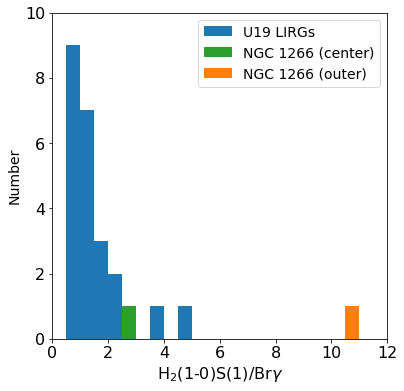

In [12]:
H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']

full_H2_brgamma = np.concatenate((H2_brgamma_lirgs, [H2_brgamma_ctr, H2_brgamma_otr]))
bins = np.arange(0,11.5,0.5)
full_H2_brgamma_hist, full_bins = np.histogram(full_H2_brgamma, bins)

fig = plt.figure(figsize=(6,6))

plt.bar(bins[0:-1], full_H2_brgamma_hist, align='edge', width=0.5, label='U19 LIRGs')


plt.bar([2.5], [1], align='edge', width=0.5, color='tab:green', label='NGC 1266 (center)')
plt.bar([10.5], [1], align='edge', width=0.5, color='tab:orange', label='NGC 1266 (outer)')

plt.ylabel('Number', fontsize=14)
plt.xlabel(r'H$_2$(1-0)S(1)/Br$\gamma$', fontsize=16)

plt.tick_params(labelsize=16)

plt.xlim(0,12)
plt.ylim(0,10)

plt.legend(fontsize=14)


In [34]:
#main 100 pc center table
Noverg_10_S2, Eu_10_S2, Noverg_10_S2_err = calc_Noverg(tab_100pc['H2(1-0)S(2)_flux'][0], 'H2_10_S2', tab_100pc['H2(1-0)S(2)_flux_err'][0])
Noverg_10_S1, Eu_10_S1, Noverg_10_S1_err = calc_Noverg(tab_100pc['H2(1-0)S(1)_flux'][0], 'H2_10_S1', tab_100pc['H2(1-0)S(1)_flux_err'][0])
Noverg_10_S0, Eu_10_S0, Noverg_10_S0_err = calc_Noverg(tab_100pc['H2(1-0)S(0)_flux'][0], 'H2_10_S0', tab_100pc['H2(1-0)S(0)_flux_err'][0])
Noverg_21_S3, Eu_21_S3, Noverg_21_S3_err = calc_Noverg(tab_100pc['H2(2-1)S(3)_flux'][0], 'H2_21_S3', tab_100pc['H2(2-1)S(3)_flux_err'][0])
Noverg_21_S2, Eu_21_S2, Noverg_21_S2_err = calc_Noverg(tab_100pc['H2(2-1)S(2)_flux'][0], 'H2_21_S2', tab_100pc['H2(2-1)S(2)_flux_err'][0])
Noverg_21_S1, Eu_21_S1, Noverg_21_S1_err = calc_Noverg(tab_100pc['H2(2-1)S(1)_flux'][0], 'H2_21_S1', tab_100pc['H2(2-1)S(1)_flux_err'][0])
Noverg_10_Q1, Eu_10_Q1, Noverg_10_Q1_err = calc_Noverg(tab_100pc['H2(1-0)Q(1)_flux'][0], 'H2_10_Q1', tab_100pc['H2(1-0)Q(1)_flux_err'][0])


Noverg_10_S2_c1, Eu_10_S2 = calc_Noverg(tab_100pc['H2(1-0)S(2)_flux'][1], 'H2_10_S2')
Noverg_10_S1_c1, Eu_10_S1 = calc_Noverg(tab_100pc['H2(1-0)S(1)_flux'][1], 'H2_10_S1')
Noverg_10_S0_c1, Eu_10_S0 = calc_Noverg(tab_100pc['H2(1-0)S(0)_flux'][1], 'H2_10_S0')
Noverg_21_S3_c1, Eu_21_S3 = calc_Noverg(tab_100pc['H2(2-1)S(3)_flux'][1], 'H2_21_S3')
Noverg_21_S2_c1, Eu_21_S2 = calc_Noverg(tab_100pc['H2(2-1)S(2)_flux'][1], 'H2_21_S2')
Noverg_21_S1_c1, Eu_21_S1 = calc_Noverg(tab_100pc['H2(2-1)S(1)_flux'][1], 'H2_21_S1')

Noverg_10_S2_c2, Eu_10_S2 = calc_Noverg(tab_100pc['H2(1-0)S(2)_flux'][2], 'H2_10_S2')
Noverg_10_S1_c2, Eu_10_S1 = calc_Noverg(tab_100pc['H2(1-0)S(1)_flux'][2], 'H2_10_S1')
Noverg_10_S0_c2, Eu_10_S0 = calc_Noverg(tab_100pc['H2(1-0)S(0)_flux'][2], 'H2_10_S0')
Noverg_21_S3_c2, Eu_21_S3 = calc_Noverg(tab_100pc['H2(2-1)S(3)_flux'][2], 'H2_21_S3')
Noverg_21_S2_c2, Eu_21_S2 = calc_Noverg(tab_100pc['H2(2-1)S(2)_flux'][2], 'H2_21_S2')
Noverg_21_S1_c2, Eu_21_S1 = calc_Noverg(tab_100pc['H2(2-1)S(1)_flux'][2], 'H2_21_S1')


#annulus fluxes
Noverg_10_S2_ann, Eu_10_S2_ann = calc_Noverg(tab_ann['H2(1-0)S(2)_flux'][0], 'H2_10_S2')
Noverg_10_S1_ann, Eu_10_S1_ann = calc_Noverg(tab_ann['H2(1-0)S(1)_flux'][0], 'H2_10_S1')
Noverg_10_S0_ann, Eu_10_S0_ann = calc_Noverg(tab_ann['H2(1-0)S(0)_flux'][0], 'H2_10_S0')
Noverg_21_S3_ann, Eu_21_S3_ann = calc_Noverg(tab_ann['H2(2-1)S(3)_flux'][0], 'H2_21_S3')
Noverg_21_S2_ann, Eu_21_S2_ann = calc_Noverg(tab_ann['H2(2-1)S(2)_flux'][0], 'H2_21_S2')
Noverg_21_S1_ann, Eu_21_S1_ann = calc_Noverg(tab_ann['H2(2-1)S(1)_flux'][0], 'H2_21_S1')


#1px table:
Noverg_10_S2_1px, Eu_10_S2 = calc_Noverg(tab_1px['H2(1-0)S(2)_flux'][0], 'H2_10_S2')
Noverg_10_S1_1px, Eu_10_S1 = calc_Noverg(tab_1px['H2(1-0)S(1)_flux'][0], 'H2_10_S1')
Noverg_10_S0_1px, Eu_10_S0 = calc_Noverg(tab_1px['H2(1-0)S(0)_flux'][0], 'H2_10_S0')
Noverg_21_S3_1px, Eu_21_S3 = calc_Noverg(tab_1px['H2(2-1)S(3)_flux'][0], 'H2_21_S3')
Noverg_21_S2_1px, Eu_21_S2 = calc_Noverg(tab_1px['H2(2-1)S(2)_flux'][0], 'H2_21_S2')
Noverg_21_S1_1px, Eu_21_S1 = calc_Noverg(tab_1px['H2(2-1)S(1)_flux'][0], 'H2_21_S1')

Noverg_10_S2_c1_1px, Eu_10_S2 = calc_Noverg(tab_1px['H2(1-0)S(2)_flux'][1], 'H2_10_S2')
Noverg_10_S1_c1_1px, Eu_10_S1 = calc_Noverg(tab_1px['H2(1-0)S(1)_flux'][1], 'H2_10_S1')
Noverg_10_S0_c1_1px, Eu_10_S0 = calc_Noverg(tab_1px['H2(1-0)S(0)_flux'][1], 'H2_10_S0')
Noverg_21_S3_c1_1px, Eu_21_S3 = calc_Noverg(tab_1px['H2(2-1)S(3)_flux'][1], 'H2_21_S3')
Noverg_21_S2_c1_1px, Eu_21_S2 = calc_Noverg(tab_1px['H2(2-1)S(2)_flux'][1], 'H2_21_S2')
Noverg_21_S1_c1_1px, Eu_21_S1 = calc_Noverg(tab_1px['H2(2-1)S(1)_flux'][1], 'H2_21_S1')

Noverg_10_S2_c2_1px, Eu_10_S2 = calc_Noverg(tab_1px['H2(1-0)S(2)_flux'][2], 'H2_10_S2')
Noverg_10_S1_c2_1px, Eu_10_S1 = calc_Noverg(tab_1px['H2(1-0)S(1)_flux'][2], 'H2_10_S1')
Noverg_10_S0_c2_1px, Eu_10_S0 = calc_Noverg(tab_1px['H2(1-0)S(0)_flux'][2], 'H2_10_S0')
Noverg_21_S3_c2_1px, Eu_21_S3 = calc_Noverg(tab_1px['H2(2-1)S(3)_flux'][2], 'H2_21_S3')
Noverg_21_S2_c2_1px, Eu_21_S2 = calc_Noverg(tab_1px['H2(2-1)S(2)_flux'][2], 'H2_21_S2')
Noverg_21_S1_c2_1px, Eu_21_S1 = calc_Noverg(tab_1px['H2(2-1)S(1)_flux'][2], 'H2_21_S1')

#10pc table:
Noverg_10_S2_10pc, Eu_10_S2 = calc_Noverg(tab_10pc['H2(1-0)S(2)_flux'][0], 'H2_10_S2')
Noverg_10_S1_10pc, Eu_10_S1 = calc_Noverg(tab_10pc['H2(1-0)S(1)_flux'][0], 'H2_10_S1')
Noverg_10_S0_10pc, Eu_10_S0 = calc_Noverg(tab_10pc['H2(1-0)S(0)_flux'][0], 'H2_10_S0')
Noverg_21_S3_10pc, Eu_21_S3 = calc_Noverg(tab_10pc['H2(2-1)S(3)_flux'][0], 'H2_21_S3')
Noverg_21_S2_10pc, Eu_21_S2 = calc_Noverg(tab_10pc['H2(2-1)S(2)_flux'][0], 'H2_21_S2')
Noverg_21_S1_10pc, Eu_21_S1 = calc_Noverg(tab_10pc['H2(2-1)S(1)_flux'][0], 'H2_21_S1')

Noverg_10_S2_c1_10pc, Eu_10_S2 = calc_Noverg(tab_10pc['H2(1-0)S(2)_flux'][1], 'H2_10_S2')
Noverg_10_S1_c1_10pc, Eu_10_S1 = calc_Noverg(tab_10pc['H2(1-0)S(1)_flux'][1], 'H2_10_S1')
Noverg_10_S0_c1_10pc, Eu_10_S0 = calc_Noverg(tab_10pc['H2(1-0)S(0)_flux'][1], 'H2_10_S0')
Noverg_21_S3_c1_10pc, Eu_21_S3 = calc_Noverg(tab_10pc['H2(2-1)S(3)_flux'][1], 'H2_21_S3')
Noverg_21_S2_c1_10pc, Eu_21_S2 = calc_Noverg(tab_10pc['H2(2-1)S(2)_flux'][1], 'H2_21_S2')
Noverg_21_S1_c1_10pc, Eu_21_S1 = calc_Noverg(tab_10pc['H2(2-1)S(1)_flux'][1], 'H2_21_S1')

Noverg_10_S2_c2_10pc, Eu_10_S2 = calc_Noverg(tab_10pc['H2(1-0)S(2)_flux'][2], 'H2_10_S2')
Noverg_10_S1_c2_10pc, Eu_10_S1 = calc_Noverg(tab_10pc['H2(1-0)S(1)_flux'][2], 'H2_10_S1')
Noverg_10_S0_c2_10pc, Eu_10_S0 = calc_Noverg(tab_10pc['H2(1-0)S(0)_flux'][2], 'H2_10_S0')
Noverg_21_S3_c2_10pc, Eu_21_S3 = calc_Noverg(tab_10pc['H2(2-1)S(3)_flux'][2], 'H2_21_S3')
Noverg_21_S2_c2_10pc, Eu_21_S2 = calc_Noverg(tab_10pc['H2(2-1)S(2)_flux'][2], 'H2_21_S2')
Noverg_21_S1_c2_10pc, Eu_21_S1 = calc_Noverg(tab_10pc['H2(2-1)S(1)_flux'][2], 'H2_21_S1')

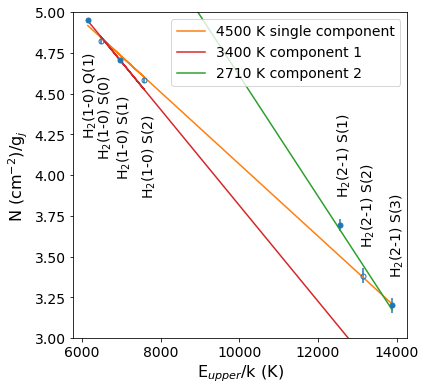

In [41]:
#excitation diagram
#extract excitation properties in center for 100pc aperture

fig = plt.figure(figsize=(6,6))
level_pops = [Noverg_10_Q1.value, Noverg_10_S2.value, Noverg_10_S1.value, Noverg_10_S0.value, 
              Noverg_21_S1.value, Noverg_21_S2.value, Noverg_21_S3.value]
level_pops_err = [Noverg_10_Q1_err.value, Noverg_10_S2_err.value, Noverg_10_S1_err.value, Noverg_10_S0_err.value, 
              Noverg_21_S1_err.value, Noverg_21_S2_err.value, Noverg_21_S3_err.value]
energy_lvls = np.array([Eu_10_Q1, Eu_10_S2, Eu_10_S1, Eu_10_S0, Eu_21_S1, Eu_21_S2, Eu_21_S3])
labels = [r'H$_2$(1-0) Q(1)', r'H$_2$(1-0) S(2)', r'H$_2$(1-0) S(1)', r'H$_2$(1-0) S(0)',
         r'H$_2$(2-1) S(1)', r'H$_2$(2-1) S(2)', r'H$_2$(2-1) S(3)']

level_pops_ortho = [Noverg_10_S1.value, Noverg_21_S1.value, Noverg_21_S3.value, Noverg_10_Q1.value]
level_pops_ortho_err = [Noverg_10_S1_err.value, Noverg_21_S1_err.value, Noverg_21_S3_err.value, Noverg_10_Q1_err.value]
energy_lvls_ortho = np.array([Eu_10_S1, Eu_21_S1, Eu_21_S3, Eu_10_Q1])
labels_ortho = [r'H$_2$(1-0) S(1)', r'H$_2$(2-1) S(1)', r'H$_2$(2-1) S(3)', r'H$_2$(1-0) Q(1)']

level_pops_para = [Noverg_10_S2.value, Noverg_10_S0.value, Noverg_21_S2.value]
level_pops_para_err = [Noverg_10_S2_err.value, Noverg_10_S0_err.value, Noverg_21_S2_err.value]
energy_lvls_para = np.array([Eu_10_S2, Eu_10_S0, Eu_21_S2])
labels_para = [r'H$_2$(1-0) S(2)', r'H$_2$(1-0) S(0)', r'H$_2$(2-1) S(2)']

level_pops_ann = [Noverg_10_S2_ann.value, Noverg_10_S1_ann.value, Noverg_10_S0_ann.value, 
              Noverg_21_S1_ann.value, Noverg_21_S2_ann.value, Noverg_21_S3_ann.value]
energy_lvls_ann = [Eu_10_S2_ann, Eu_10_S1_ann, Eu_10_S0_ann, Eu_21_S1_ann, Eu_21_S2_ann, Eu_21_S3_ann]

log_Ng = np.log10(level_pops)
log_Ng_err = level_pops_err/(np.array(level_pops)*np.log(10))
log_Ng_ortho = np.log10(level_pops_ortho)
log_Ng_ortho_err = level_pops_ortho_err/(np.array(level_pops_ortho)*np.log(10))
log_Ng_para = np.log10(level_pops_para)
log_Ng_para_err = level_pops_para_err/(np.array(level_pops_para)*np.log(10))

for i in range(len(energy_lvls)):
    if energy_lvls[i] < 10000:
        yval = log_Ng[i] - 0.7
    else:
        yval = log_Ng[i] + 0.2
        
    if i == 0:
        xval = energy_lvls[i]-150
    else:
        xval = energy_lvls[i]-100
    plt.text(xval, yval, labels[i], rotation='vertical', fontsize=14)

plt.errorbar(energy_lvls_ortho, log_Ng_ortho, yerr=log_Ng_ortho_err, marker='o', linestyle='', color='tab:blue', markersize=5)
plt.errorbar(energy_lvls_para, log_Ng_para, yerr=log_Ng_para_err, marker='o', linestyle='', color='tab:blue', fillstyle='none', markersize=5)

##linear fitting
popt, pcov = curve_fit(linfunc, energy_lvls, log_Ng, sigma=log_Ng_err, absolute_sigma=True)

plt.plot(energy_lvls, linfunc(energy_lvls, popt[0], popt[1]), color='tab:orange', label=f'{int(-np.round(1/popt[0], -2))} K single component')

popt_first, pcov_first = curve_fit(linfunc, energy_lvls[0:4], log_Ng[0:4], sigma=log_Ng_err[0:4], absolute_sigma=True)
popt_end, pcov_end = curve_fit(linfunc, energy_lvls[4:7], log_Ng[4:7], sigma=log_Ng_err[4:7], absolute_sigma=True)

plt.plot(energy_lvls, linfunc(energy_lvls, popt_first[0], popt_first[1]), 
         color='tab:red', label=f'{int(-np.round(1/popt_first[0], -1))} K component 1')
plt.plot(energy_lvls, linfunc(energy_lvls, popt_end[0], popt_end[1]),
         color='tab:green', label=f'{int(-np.round(1/popt_end[0], -1))} K component 2')



plt.legend(fontsize=14)

plt.xticks([6000, 8000, 10000, 12000, 14000],fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel(r'N (cm$^{-2}$)/g$_j$', fontsize=16)

plt.xlabel(r'E$_{upper}$/k (K)', fontsize=16)

plt.ylim(3,5)

plt.savefig('plots/excitation_diagram_100pc.png', bbox_inches='tight')


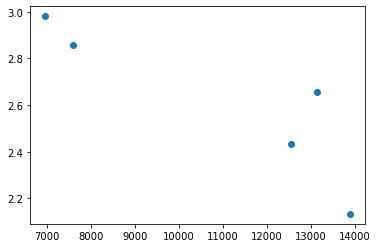

In [41]:
## Testing excitation calculation with Zovaro+19 fluxes

Z19_10_S1 = 5.2e-16
Z19_10_S2 = 2e-16
Z19_21_S1 = 2e-16
Z19_21_S2 = 1.67e-16
Z19_21_S3 = 1.972e-16

Z19_10_S1_N, Eu_10_S1 = calc_Noverg(Z19_10_S1, 'H2_10_S1')
Z19_10_S2_N, Eu_10_S2 = calc_Noverg(Z19_10_S2, 'H2_10_S2')
Z19_21_S1_N, Eu_21_S1 = calc_Noverg(Z19_21_S1, 'H2_21_S1')
Z19_21_S2_N, Eu_21_S2 = calc_Noverg(Z19_21_S2, 'H2_21_S2')
Z19_21_S3_N, Eu_21_S3 = calc_Noverg(Z19_21_S3, 'H2_21_S3')

Ng_Z19 = np.log10([Z19_10_S1_N.value, Z19_10_S2_N.value, Z19_21_S1_N.value, Z19_21_S2_N.value, Z19_21_S3_N.value])
Elevels_Z19 = [Eu_10_S1, Eu_10_S2, Eu_21_S1, Eu_21_S2, Eu_21_S3]

plt.plot(Elevels_Z19, Ng_Z19, marker='o', linestyle='')


In [56]:
#calculate ortho to para ratio

#format - A, wavelength, Eupper, J
line_dict = {'H2_10_S2':[3.98e-7, 2.0338, 7584, 4], 'H2_10_S1':[3.47e-7, 2.1218, 6956, 3],
            'H2_10_S0':[2.53e-7, 2.2235, 6471, 2], 'H2_21_S1':[4.98e-7, 2.2477, 12550, 3],
            'H2_21_S2':[5.60e-7, 2.1542, 13150, 2], 'H2_21_S3':[5.77e-7, 2.0735, 13890, 5],
            'H2_10_Q1':[4.29e-7, 2.4066, 6149, 1]}

H2_10_S2_flux = tab_100pc['H2(1-0)S(2)_flux'][0]
H2_10_S2_flux_err = tab_100pc['H2(1-0)S(2)_flux_err'][0]
H2_10_S1_flux = tab_100pc['H2(1-0)S(1)_flux'][0]
H2_10_S1_flux_err = tab_100pc['H2(1-0)S(1)_flux_err'][0]
H2_10_S0_flux = tab_100pc['H2(1-0)S(0)_flux'][0]
H2_10_S0_flux_err = tab_100pc['H2(1-0)S(0)_flux_err'][0]

E_10_S2 = 7584
E_10_S1 = 6956
E_10_S0 = 6471
A_10_S2 = 3.98e-7
A_10_S1 = 3.47e-7
A_10_S0 = 2.53e-7
lambda_10_S2 = 2.0338
lambda_10_S1 = 2.1218
lambda_10_S0 = 2.2235
g_S2 = 9
g_S0 = 5
J_S1 = 3
J_S0 = 2

Trot_eqn = -1113/np.log(0.323*H2_10_S2_flux/H2_10_S0_flux) * u.K #eqn from U19, Reunanen02
#can also derive this easily by taking 1/slope between the two points

delta_E = - E_10_S0 + E_10_S2
log_coeff = (lambda_10_S0 * A_10_S2 * g_S2)/(lambda_10_S2 * A_10_S0 * g_S0)
Trot = delta_E / np.log(log_coeff * (H2_10_S0_flux / H2_10_S2_flux))

delta_E_op = - E_10_S0 + E_10_S1

gratio = (2*J_S0+1)/(2*J_S1+1)*(H2_10_S1_flux * lambda_10_S1 * A_10_S0) / (H2_10_S0_flux * lambda_10_S0 * A_10_S1)*np.exp(delta_E_op/Trot)

#Noverg = Noverg.decompose().to(u.cm**-2) / g_J

#Noverg_err = 4*np.pi*(line_wave*u.micron)/(const.h * const.c) * (flux_err*u.erg/u.s/(u.cm**2)) / (line_A/u.s)
#Noverg_err = Noverg_err.decompose().to(u.cm**-2) / g_J


In [57]:
print(Trot)
print(gratio)

2053.622765081111
2.8958653079987404
